In [1]:
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline

In [14]:
# Load the run history data and fix coltypes:
df = pd.read_pickle('runHist.pkl')
colTypes = {'qV': float, 'reward': float,'alpha':float, 'deadline':int}
for c in colTypes:
    df[c] = df[c].apply(lambda x: colTypes[c](x)) 

# Create some reporting features
df['Error'] = df['reward'].apply(lambda x: 1 if x < 0 else 0)
df['Reached'] = df.apply(lambda x: 1 if x['reward']==12 else 0, axis=1)
df['Failed'] = df.apply(lambda x: 1 if x['reward']!=12 and x['deadline']==12 else 0, axis=1)
df['Trial'] = df.apply(lambda x: 1 if x['counter']==1 else 0, axis=1)
df['Steps'] = 1

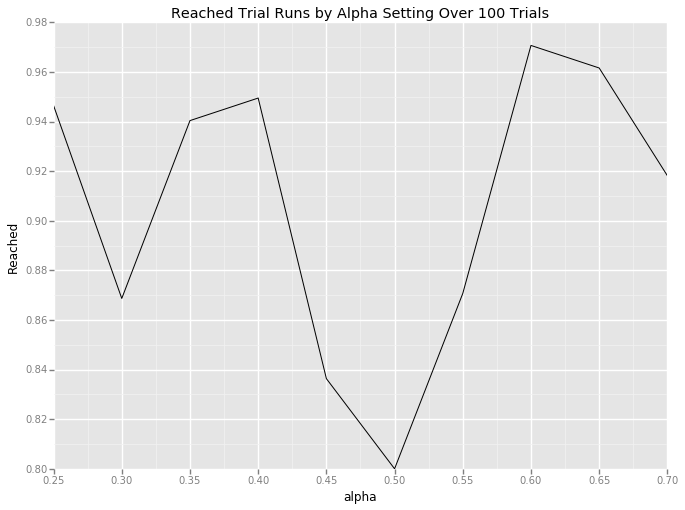

<ggplot: (11289604)>


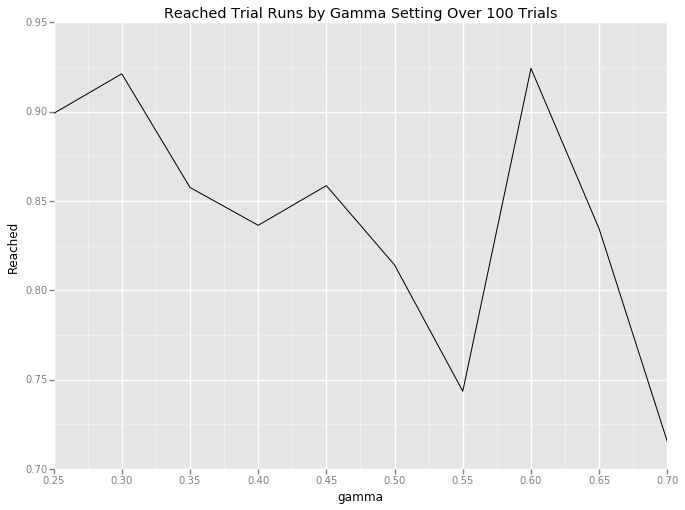

<ggplot: (20446994)>


In [11]:
temp = df.groupby(['experiment','alpha','gamma'])['Reached','Failed','Trial'].sum()
temp=temp.reset_index()
temp['Reached'] = temp['Reached']/temp['Trial']
a = temp[temp['experiment']=='alpha']
g = temp[temp['experiment']=='gamma']
p = ggplot(a, aes(x='alpha',y='Reached')) + geom_line() + ggtitle('Reached Trial Runs by Alpha Setting Over 100 Trials')
print(p)
p = ggplot(g, aes(x='gamma',y='Reached')) + geom_line() + ggtitle('Reached Trial Runs by Gamma Setting Over 100 Trials')
print(p)

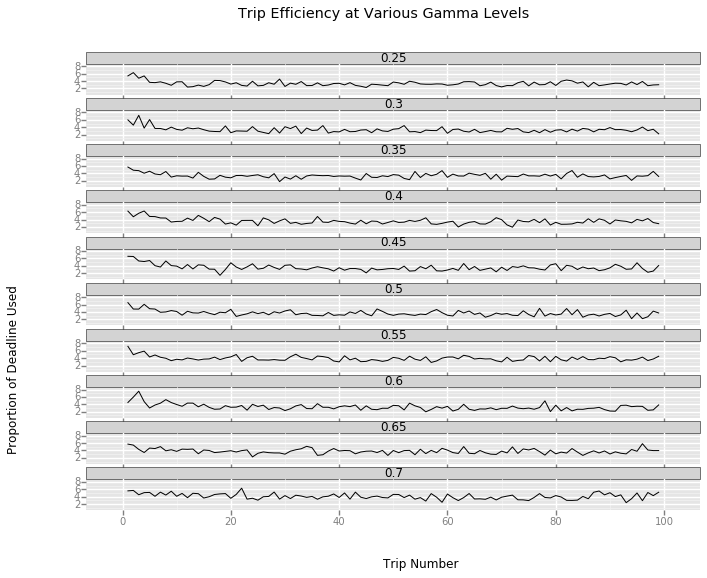

<ggplot: (14015236)>

In [4]:
temp = df[df['experiment']=='gamma'].groupby(['trip','gamma']).agg({'deadline':'max','Steps':'sum'})
temp['deadline']+=1
temp['UtilizedMoves'] = temp.apply(lambda t: t['Steps']/(t['deadline']*1.0), axis=1) 
temp = temp.reset_index()
temp
ggplot(temp, aes(x='trip', y='UtilizedMoves')) + facet_grid('gamma') + geom_line() + ggtitle('Trip Efficiency at Various Gamma Levels') + xlab('Trip Number') + ylab('Proportion of Deadline Used')

In [5]:
df['alpha'].unique()

array([ 0.3 ,  0.7 ,  0.65,  0.6 ,  0.55,  0.5 ,  0.45,  0.4 ,  0.35,
        0.3 ,  0.25])

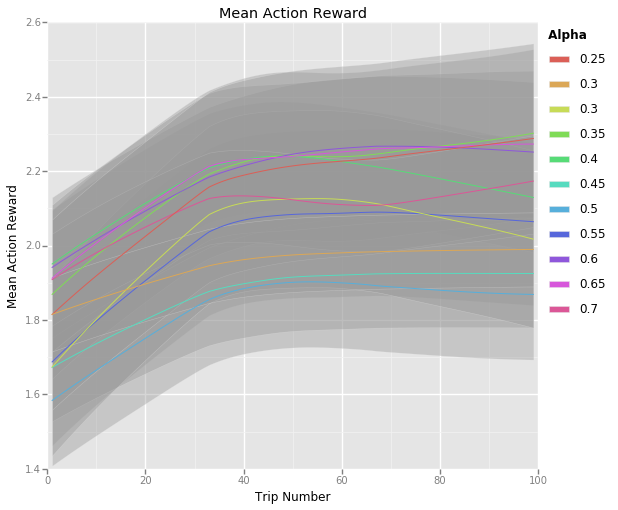

<ggplot: (20457480)>

In [9]:
tempq = df.groupby(['trip','alpha'])['reward'].mean().reset_index()
tempq['alpha'] = pd.Categorical(tempq['alpha'])
ggplot(tempq, aes(x='trip', y='reward', color='alpha')) + geom_smooth() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

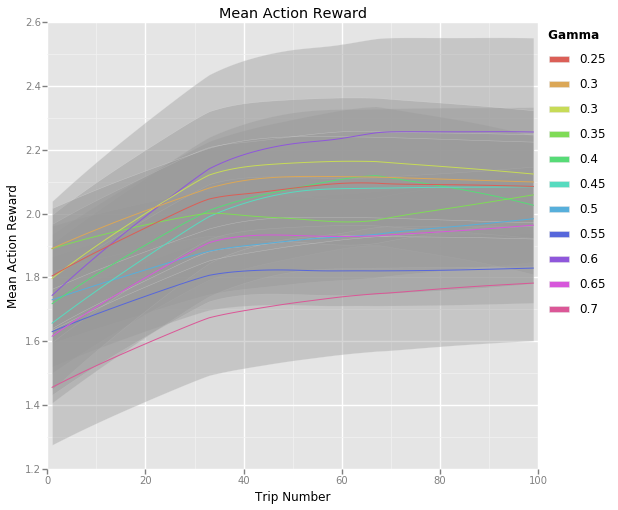

<ggplot: (15369900)>

In [7]:
tempq = df.groupby(['trip','gamma'])['reward'].mean().reset_index()
tempq['gamma'] = pd.Categorical(tempq['gamma'])
ggplot(tempq, aes(x='trip', y='reward', color='gamma')) + geom_smooth() + ggtitle('Mean Action Reward') + xlab('Trip Number') + ylab('Mean Action Reward')

In [ ]:
tempq = df.groupby(['trip','alpha'])['Error'].sum().reset_index()
ggplot(tempq, aes(x='trip', y='Error', color='alpha')) + geom_line() + ggtitle('Number of Penalties per Trip') + xlab('Trip Number') + ylab('Total Errors')


In [18]:
df[(df['light']=='red') & (df['trip']>50) & (df['next_waypoint']=='right')]

,experiment,batch,trip,counter,light,opposing,next_waypoint,action,qA,qV,reward,alpha,gamma,deadline,Explored,Error,Reached,Failed,Trial,Steps
199.52.1,gamma,199,52,1,red,False,right,right,right,6.322648,2,0.30,0.7,25,False,0,0,0,1,1
199.54.1,gamma,199,54,1,red,False,right,right,right,6.198896,2,0.30,0.7,30,False,0,0,0,1,1
199.54.8,gamma,199,54,8,red,False,right,right,right,6.112269,12,0.30,0.7,23,False,0,1,0,0,1
199.63.7,gamma,199,63,7,red,False,right,right,right,9.162165,12,0.30,0.7,24,False,0,1,0,0,1
199.65.1,gamma,199,65,1,red,False,right,right,right,11.937570,2,0.30,0.7,20,False,0,0,0,1,1
199.65.2,gamma,199,65,2,red,False,right,right,right,11.463188,2,0.30,0.7,19,False,0,0,0,0,1
199.70.1,gamma,199,70,1,red,False,right,right,right,11.031501,2,0.30,0.7,35,False,0,0,0,1,1
199.75.8,gamma,199,75,8,red,False,right,right,right,10.599250,12,0.30,0.7,13,False,0,1,0,0,1
199.76.2,gamma,199,76,2,red,False,right,right,right,13.245318,2,0.30,0.7,19,False,0,0,0,0,1
199.77.1,gamma,199,77,1,red,False,right,right,right,12.653239,2,0.30,0.7,30,False,0,0,0,1,1


In [ ]:
tempq.groupby('alpha').mean()
# 0.5, 0.5 -  0.292929